In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm.auto import tqdm

from loren_frank_data_processing import make_epochs_dataframe, make_neuron_dataframe
from src.parameters import ANIMALS, MIN_N_NEURONS, _BRAIN_AREAS
from src.load_data import get_sleep_and_prevpost_run_epochs
from ZilongCode.utils import get_diffusion_exponent
from scipy.stats import ttest_rel

In [2]:
epoch_info = make_epochs_dataframe(ANIMALS)
neuron_info = make_neuron_dataframe(ANIMALS)

neuron_info = neuron_info.loc[
    (neuron_info.type == "principal")
    & (neuron_info.numspikes > 100)
    & neuron_info.area.isin(_BRAIN_AREAS)
]

n_neurons = (
    neuron_info.groupby(["animal", "day", "epoch"])
    .neuron_id.agg(len)
    .rename("n_neurons")
    .to_frame()
)

epoch_info = epoch_info.join(n_neurons)

# select only sleep epochs
is_sleep = epoch_info.type.isin(["sleep"])

is_animal = epoch_info.index.isin(
    ["bon", "fra", "gov", "dud", "con", "dav", "Cor", "egy", "cha"], level="animal"
)

# get valid epochs with is_sleep and is_animal and n_neurons > MIN_N_NEURONS
valid_epochs = epoch_info.loc[
    is_sleep & is_animal & (epoch_info.n_neurons > MIN_N_NEURONS)
]

sleep_epoch_keys, prev_run_epoch_keys, post_run_epoch_keys = get_sleep_and_prevpost_run_epochs()

# get valid sleep epochs with keys only in sleep_epoch_keys
valid_sleep_epochs = valid_epochs.loc[valid_epochs.index.isin(sleep_epoch_keys)]

PROCESSED_DATA_DIR = "/home/zilong/Desktop/replay_trajectory_paper/Processed-Data"

In [6]:
SleepEXP = []
SleepIntcp = []
PrevRunEXP = []
PrevRunIntcp = []
PostRunEXP = []
PostRunIntcp = []


for sleep_epoch_key in tqdm(valid_sleep_epochs.index, desc="epochs"):
    # current sleep epoch
    animal_sleep, day_sleep, epoch_sleep = sleep_epoch_key

    # get previous run epoch
    prev_run_epoch_key = prev_run_epoch_keys[sleep_epoch_keys.index(sleep_epoch_key)]
    animal_prev_run, day_prev_run, epoch_prev_run = prev_run_epoch_key
    post_run_epoch_key = post_run_epoch_keys[sleep_epoch_keys.index(sleep_epoch_key)]
    animal_post_run, day_post_run, epoch_post_run = post_run_epoch_key

    #if either 
    
    # for each sleep_epoch_key
    sleep_result = os.path.join(
        PROCESSED_DATA_DIR,
        "TrueSleepReplayTrajectories",
        (f"{animal_sleep}_{day_sleep:02d}_{epoch_sleep:02d}_traj.pkl"),
    )
    
    prev_run_result = os.path.join(
        PROCESSED_DATA_DIR,
        "ReplayTrajectories",
        (f"{animal_prev_run}_{day_prev_run:02d}_{epoch_prev_run:02d}_traj.pkl"),
    )
    
    #extract post run epoch results
    post_run_result = os.path.join(
        PROCESSED_DATA_DIR,
        "ReplayTrajectories",
        (f"{animal_post_run}_{day_post_run:02d}_{epoch_post_run:02d}_traj.pkl"),
    )    
    
    # check if the file exists, if does, then extract the data
    if os.path.exists(sleep_result) and os.path.exists(prev_run_result) and os.path.exists(post_run_result):

        print("Loading %s" % sleep_result)
        with open(sleep_result, "rb") as f:
            Sleep_Replay_traj = pickle.load(f)

        print("Loading %s" % prev_run_result)
        with open(prev_run_result, "rb") as f:
            Prev_Run_Replay_traj = pickle.load(f)

        # get exponent for sleep epoch
        sleep_exponent, sleep_intercept = get_diffusion_exponent(
            Sleep_Replay_traj, get_intercept=True
        )
        SleepEXP.append(sleep_exponent)
        SleepIntcp.append(sleep_intercept)

        # get exponent for run epoch
        prev_run_exponent, prev_run_intercept = get_diffusion_exponent(
            Prev_Run_Replay_traj, get_intercept=True
        )
        PrevRunEXP.append(prev_run_exponent)
        PrevRunIntcp.append(prev_run_intercept)

        print("Loading %s" % post_run_result)
        with open(post_run_result, "rb") as f:
            Post_Run_Replay_traj = pickle.load(f)

        # get exponent for post run epoch
        post_run_exponent, post_run_intercept = get_diffusion_exponent(
            Post_Run_Replay_traj, get_intercept=True
        )
        PostRunEXP.append(post_run_exponent)
        PostRunIntcp.append(post_run_intercept)


            
        
        

epochs:  10%|▉         | 8/84 [00:00<00:01, 72.77it/s]

Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/Cor_02_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/Cor_02_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/Cor_02_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_03_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_03_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_03_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_03_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_03_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_03_06_traj.pkl
Loading /home/zilon

epochs:  19%|█▉        | 16/84 [00:00<00:02, 33.60it/s]

Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_06_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_07_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_07_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_07_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_07_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_07_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_07_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_08_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_08_02_traj.pkl
Loading /home/zilon

epochs:  25%|██▌       | 21/84 [00:00<00:02, 26.25it/s]

Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_08_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_08_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_08_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/bon_10_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_10_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/bon_10_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/cha_04_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/cha_04_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/cha_04_04_traj.pkl
Loading /home/zilon

epochs:  40%|████      | 34/84 [00:00<00:01, 36.57it/s]

Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/con_03_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/con_03_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/con_03_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/con_05_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/con_05_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/con_05_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/con_06_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/con_06_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/con_06_04_traj.pkl
Loading /home/zilon

epochs:  48%|████▊     | 40/84 [00:01<00:01, 37.81it/s]

Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/dav_06_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/dav_06_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/dav_06_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/dav_06_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/dud_02_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/dud_02_02_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/dud_02_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/egy_05_03_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/egy_05_02_traj.pkl
Loading /home/zilon

epochs: 100%|██████████| 84/84 [00:01<00:00, 57.22it/s]

Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/egy_05_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/egy_08_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/egy_08_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/egy_08_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/gov_07_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/gov_07_04_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/gov_07_06_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/TrueSleepReplayTrajectories/gov_08_05_traj.pkl
Loading /home/zilong/Desktop/replay_trajectory_paper/Processed-Data/ReplayTrajectories/gov_08_04_traj.pkl
Loading /home/zilon

0.004775081659652943


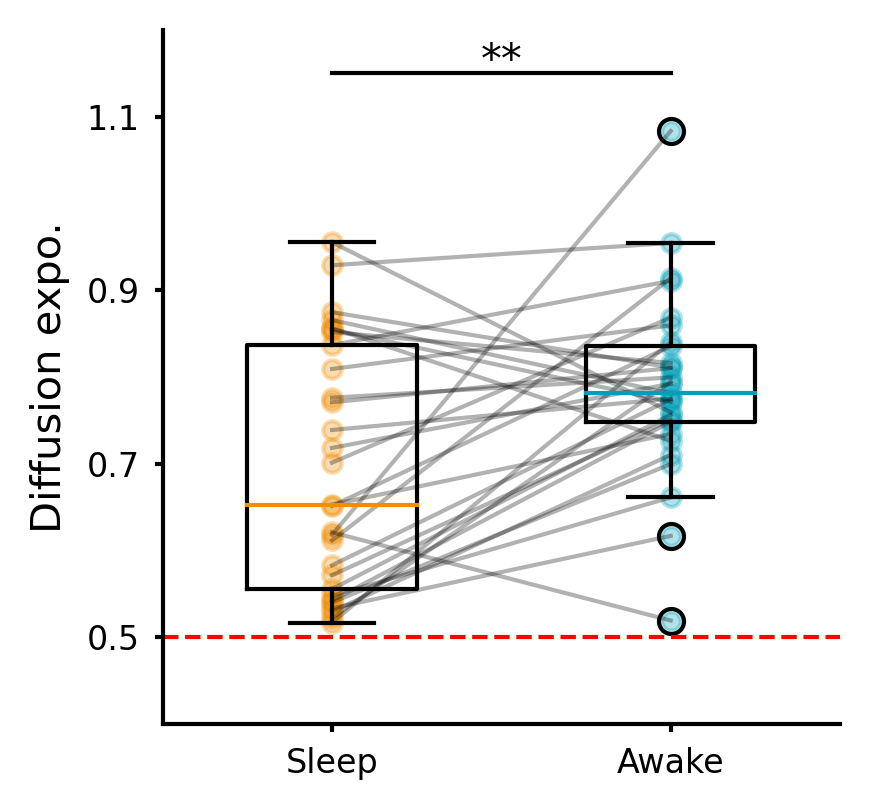

In [12]:
# barplot of SleepEXP and RunEXP in subplot 1, as well as SleepIntcp and RunIntcp in subplot 2
fig, ax = plt.subplots(1, 1, figsize=(3, 2.8), dpi=300)

labelsize = 10
ticksize = 8
#
bp = ax.boxplot([SleepEXP, PrevRunEXP], positions=[0, 1], widths=0.5)

# Set different colors for medians
for median, color in zip(bp["medians"], ["#F18D00", "#009FB9"]):
    median.set(color=color)

# add scatter plot
ax.scatter(np.zeros(len(SleepEXP)), SleepEXP, color="#F18D00", s=20, alpha=0.3)
ax.scatter(np.ones(len(PrevRunEXP)), PrevRunEXP, color="#009FB9", s=20, alpha=0.3)

# link paired data with a line
for i in range(len(SleepEXP)):
    ax.plot([0, 1], [SleepEXP[i], PrevRunEXP[i]], color="black", alpha=0.3, linewidth=1)

# add a horizontal line at y=0.5 as red
ax.axhline(y=0.5, color="red", linestyle="--", linewidth=1)

# carry out wilcoxon test
from scipy.stats import wilcoxon

stat, p = wilcoxon(SleepEXP, PrevRunEXP)
print(p)
# stat, p = ttest_rel(SleepEXP, RunEXP)

# add horizontal line link (0,1) and (1,1)
ax.plot([0, 1], [1.15, 1.15], color="black", alpha=1, linewidth=1)
# add horizontal line and stars above the line to indicate the p value
if p < 0.001:
    ax.text(0.5, 1.15, "***", fontsize=labelsize, horizontalalignment="center")
elif p < 0.01:
    ax.text(0.5, 1.15, "**", fontsize=labelsize, horizontalalignment="center")
elif p < 0.05:
    ax.text(0.5, 1.15, "*", fontsize=labelsize, horizontalalignment="center")
else:
    ax.text(
        0.5,
        1.15,
        "n.s.",
        fontsize=labelsize,
        horizontalalignment="center",
        verticalalignment="center",
    )

# add stats and p value to the title
# ax[0].set_title('Wilcoxon test: stat=%.2f, p=%.3f'%(stat, p))
# ax.set_title("t(52)=%.2f, p=%.3f" % (stat, p), fontsize=ticksize, pad=5)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Sleep", "Awake"], fontsize=labelsize)
ax.set_ylabel("Diffusion expo.", fontsize=labelsize)
ax.set_ylim([0.4, 1.2])
# yticks as 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
ax.set_yticks([0.5, 0.7, 0.9, 1.1])
# set ticksize
ax.tick_params(labelsize=ticksize)

# spines top and right off
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# axis line width 1.0
ax.spines["bottom"].set_linewidth(1.0)
ax.spines["left"].set_linewidth(1.0)
# axes tick width
ax.tick_params(axis="both", which="both", length=2, width=1.0)

plt.tight_layout()


0.021286106515804072


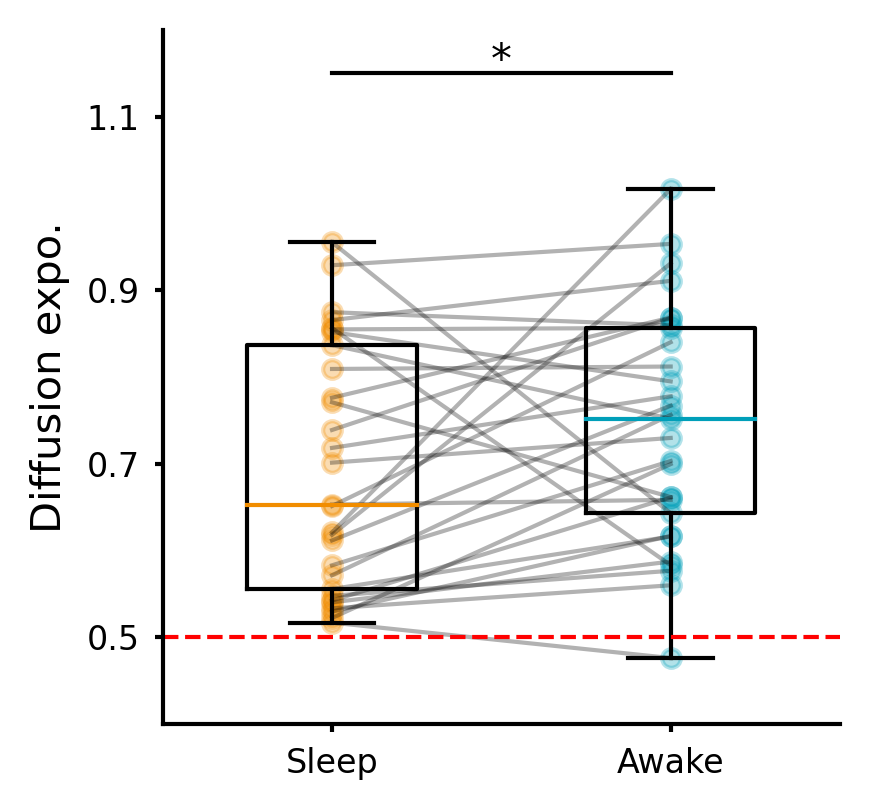

In [11]:
# barplot of SleepEXP and RunEXP in subplot 1, as well as SleepIntcp and RunIntcp in subplot 2
fig, ax = plt.subplots(1, 1, figsize=(3, 2.8), dpi=300)

labelsize = 10
ticksize = 8
#
bp = ax.boxplot([SleepEXP, PostRunEXP], positions=[0, 1], widths=0.5)

# Set different colors for medians
for median, color in zip(bp["medians"], ["#F18D00", "#009FB9"]):
    median.set(color=color)

# add scatter plot
ax.scatter(np.zeros(len(SleepEXP)), SleepEXP, color="#F18D00", s=20, alpha=0.3)
ax.scatter(np.ones(len(PostRunEXP)), PostRunEXP, color="#009FB9", s=20, alpha=0.3)

# link paired data with a line
for i in range(len(SleepEXP)):
    ax.plot([0, 1], [SleepEXP[i], PostRunEXP[i]], color="black", alpha=0.3, linewidth=1)

# add a horizontal line at y=0.5 as red
ax.axhline(y=0.5, color="red", linestyle="--", linewidth=1)

# carry out wilcoxon test
from scipy.stats import wilcoxon

stat, p = wilcoxon(SleepEXP, PostRunEXP)
print(p)
# stat, p = ttest_rel(SleepEXP, RunEXP)

# add horizontal line link (0,1) and (1,1)
ax.plot([0, 1], [1.15, 1.15], color="black", alpha=1, linewidth=1)
# add horizontal line and stars above the line to indicate the p value
if p < 0.001:
    ax.text(0.5, 1.15, "***", fontsize=labelsize, horizontalalignment="center")
elif p < 0.01:
    ax.text(0.5, 1.15, "**", fontsize=labelsize, horizontalalignment="center")
elif p < 0.05:
    ax.text(0.5, 1.15, "*", fontsize=labelsize, horizontalalignment="center")
else:
    ax.text(
        0.5,
        1.15,
        "n.s.",
        fontsize=labelsize,
        horizontalalignment="center",
        verticalalignment="center",
    )

# add stats and p value to the title
# ax[0].set_title('Wilcoxon test: stat=%.2f, p=%.3f'%(stat, p))
# ax.set_title("t(52)=%.2f, p=%.3f" % (stat, p), fontsize=ticksize, pad=5)
ax.set_xticks([0, 1])
ax.set_xticklabels(["Sleep", "Awake"], fontsize=labelsize)
ax.set_ylabel("Diffusion expo.", fontsize=labelsize)
ax.set_ylim([0.4, 1.2])
# yticks as 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
ax.set_yticks([0.5, 0.7, 0.9, 1.1])
# set ticksize
ax.tick_params(labelsize=ticksize)

# spines top and right off
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# axis line width 1.0
ax.spines["bottom"].set_linewidth(1.0)
ax.spines["left"].set_linewidth(1.0)
# axes tick width
ax.tick_params(axis="both", which="both", length=2, width=1.0)

plt.tight_layout()


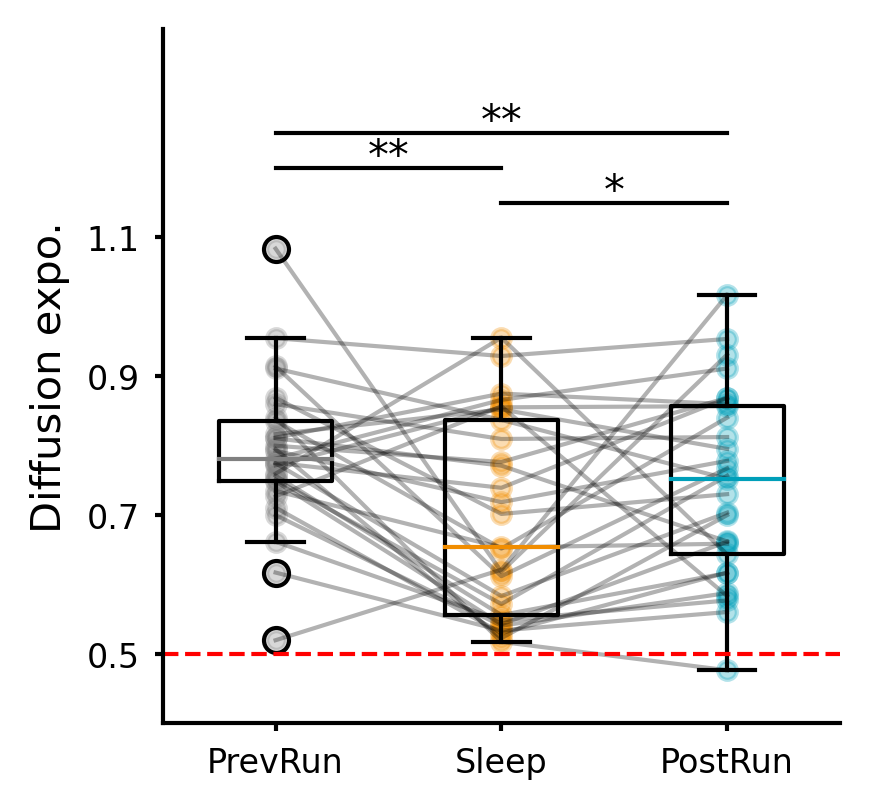

In [29]:
# barplot of SleepEXP and RunEXP in subplot 1, as well as SleepIntcp and RunIntcp in subplot 2
fig, ax = plt.subplots(1, 1, figsize=(3, 2.8), dpi=300)

labelsize = 10
ticksize = 8
#
bp = ax.boxplot([PrevRunEXP, SleepEXP, PostRunEXP], positions=[0, 1, 2], widths=0.5)

# Set different colors for medians
for median, color in zip(bp["medians"], ["grey", "#F18D00", "#009FB9",]):
    median.set(color=color)

# add scatter plot

ax.scatter(np.zeros(len(PrevRunEXP)), PrevRunEXP, color="grey", s=20, alpha=0.3)
ax.scatter(np.ones(len(SleepEXP)), SleepEXP, color="#F18D00", s=20, alpha=0.3)
ax.scatter(2*np.ones(len(PostRunEXP)), PostRunEXP, color="#009FB9", s=20, alpha=0.3)

# link paired data with a line
for i in range(len(SleepEXP)):
    ax.plot([0, 1, 2], [PrevRunEXP[i], SleepEXP[i], PostRunEXP[i]], color="black", alpha=0.3, linewidth=1)

# add a horizontal line at y=0.5 as red
ax.axhline(y=0.5, color="red", linestyle="--", linewidth=1)

# carry out wilcoxon test
from scipy.stats import wilcoxon


stat, p = wilcoxon(PrevRunEXP, SleepEXP)


# add horizontal line link (0,1) and (1,1)
ax.plot([0, 1], [1.2, 1.2], color="black", alpha=1, linewidth=1)
# add horizontal line and stars above the line to indicate the p value
if p < 0.001:
    ax.text(0.5, 1.2, "***", fontsize=labelsize, horizontalalignment="center")
elif p < 0.01:
    ax.text(0.5, 1.2, "**", fontsize=labelsize, horizontalalignment="center")
elif p < 0.05:
    ax.text(0.5, 1.2, "*", fontsize=labelsize, horizontalalignment="center")
else:
    ax.text(
        0.5,
        1.2,
        "n.s.",
        fontsize=labelsize,
        horizontalalignment="center",
        verticalalignment="center",
    )


stat, p = wilcoxon(SleepEXP, PostRunEXP)
# stat, p = ttest_rel(SleepEXP, RunEXP)

# add horizontal line link (0,1) and (1,1)
ax.plot([1, 2], [1.15, 1.15], color="black", alpha=1, linewidth=1)
# add horizontal line and stars above the line to indicate the p value
if p < 0.001:
    ax.text(1.5, 1.15, "***", fontsize=labelsize, horizontalalignment="center")
elif p < 0.01:
    ax.text(1.5, 1.15, "**", fontsize=labelsize, horizontalalignment="center")
elif p < 0.05:
    ax.text(1.5, 1.15, "*", fontsize=labelsize, horizontalalignment="center")
else:
    ax.text(
        1.5,
        1.15,
        "n.s.",
        fontsize=labelsize,
        horizontalalignment="center",
        verticalalignment="center",
    )

stat, p = wilcoxon(PrevRunEXP, PostRunEXP)

# add horizontal line link (0,1) and (1,1)
ax.plot([0, 2], [1.25, 1.25], color="black", alpha=1, linewidth=1)
# add horizontal line and stars above the line to indicate the p value
if p < 0.001:
    ax.text(1, 1.25, "***", fontsize=labelsize, horizontalalignment="center")
elif p < 0.01:
    ax.text(1, 1.25, "**", fontsize=labelsize, horizontalalignment="center")
elif p < 0.05:
    ax.text(1, 1.25, "*", fontsize=labelsize, horizontalalignment="center")
else:
    ax.text(
        1,
        1.2,
        "n.s.",
        fontsize=labelsize,
        horizontalalignment="center",
        verticalalignment="center",
    )


# add stats and p value to the title
# ax[0].set_title('Wilcoxon test: stat=%.2f, p=%.3f'%(stat, p))
# ax.set_title("t(52)=%.2f, p=%.3f" % (stat, p), fontsize=ticksize, pad=5)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["PrevRun", "Sleep", "PostRun"], fontsize=labelsize)
ax.set_ylabel("Diffusion expo.", fontsize=labelsize)
ax.set_ylim([0.4, 1.4])
# yticks as 0.5, 0.6, 0.7, 0.8, 0.9, 1.0
ax.set_yticks([0.5, 0.7, 0.9, 1.1])
# set ticksize
ax.tick_params(labelsize=ticksize)

# spines top and right off
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# axis line width 1.0
ax.spines["bottom"].set_linewidth(1.0)
ax.spines["left"].set_linewidth(1.0)
# axes tick width
ax.tick_params(axis="both", which="both", length=2, width=1.0)

plt.tight_layout()